# Once for All #
https://arxiv.org/pdf/1908.09791.pdf

## Main contribution ##
1. First paper to decouple training and search in NAS

## Methods ##
In training stage, design a once-for-all network that's trained once and from which sub-networks can be derived from choosing different parts of the network (options including *depth, width, kernel size, resolution*) to suit deployment needs. 

In specification stage, sample sub-networks to train an accuracy predictor and a latency predictor, based on which we can then conduct low-cost search given hardware and constraints. 
### Search Space ###
mobilenet-v3 like space

**input resolution**: {128, 132, 136, ..., 224} \\
**number of layers per stage (i.e. depth)**: {2, 3, 4} \\
**expansion ratio (i.e. width)**: {3, 4, 6} \\
**kernel size**: {3, 5, 7} \\
**Size of search space for 5 stages**: $((3\times 3)^2+(3\times 3)^3+(3\times 3)^4)^5\approx 2\times 10^{19}$ 
### Training Stage ###
#### Optimization Target ####
$$
\underset{W_o}{min} \sum_{arch_i} \mathcal{L}_{val}(C(W_o, arch_i))
$$
How to train the once-for-all network so that all sub-networks have good performance? 
1. Perform gradient descent on the optimization target directly. Not feasible due to the large number of architectures. 
2. Perform gradient descent on sub-samples of architectures. Not working in practice. 

#### Progressive Shrinking ####
Enforce training order from largest to smallest network in progressive manner.

Details:
1. Order: from largest to smallest, kernel size -> depth -> width (This can be compared to channel pruning, except OFA is more flexible and not limited to just width)
2. How to prevent sub-networks to interfere with each other? Apply joint loss function of groudtruth labels and soft labels given by the trained largest network (knowledge distillation). Use small learning rate.

**Elastic kernel size**

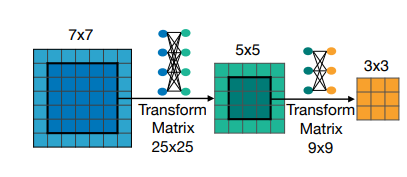

Inner kernels are shared. Introduced 2 transformation matrices of size 5x5 and 3x3 for every layer to allow greater flexibility. 

**Elastic depth**

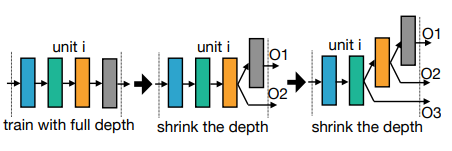

Keep the first D layers and skip the last 4-D layers.

**Elastic width**

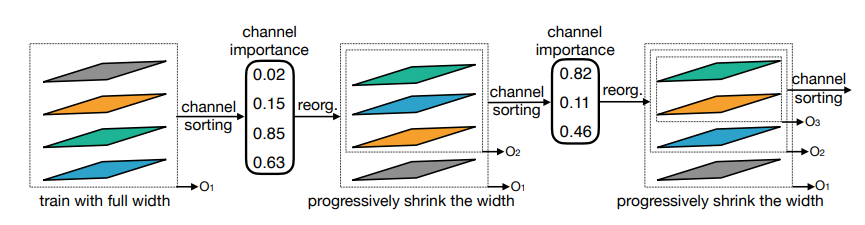

Sort channels by l1-norm to signify importance (same as channel pruning). Keep more important channels while dropping less important ones.

**Elastic resolution**

Elastic throughout training process. Crop images to random resolutions for each batch of data.

### Specification Stage ###
1. sample 16K sub-networks and evaluate them on 10k validation set
2. train accuracy predictor
3. build a latency look-up table based on target hardware
4. Use GA to search for architecture that satisfies needs

## Results ##
### Cost ###
1200 GPU hours w/ V100 GPU

### benefit of progressive shrinking ###
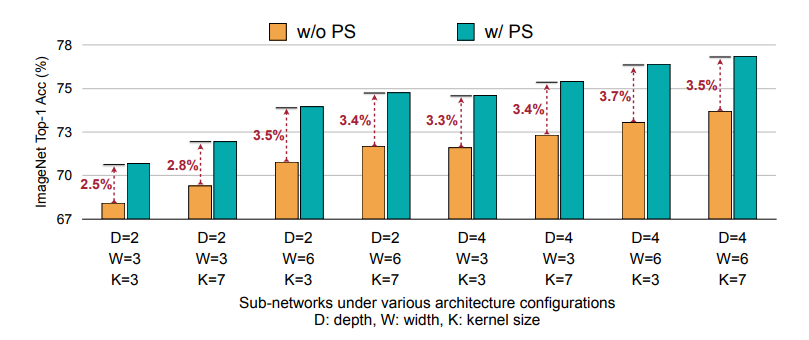

### comparison of OFA w/ SOTA on google pixel one ###

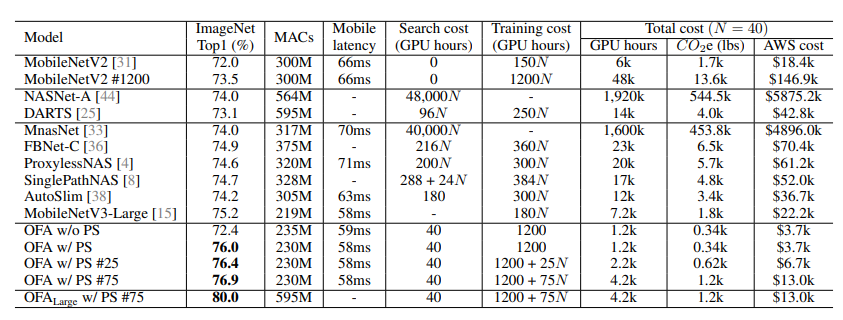

### comparison with efficientnet ###
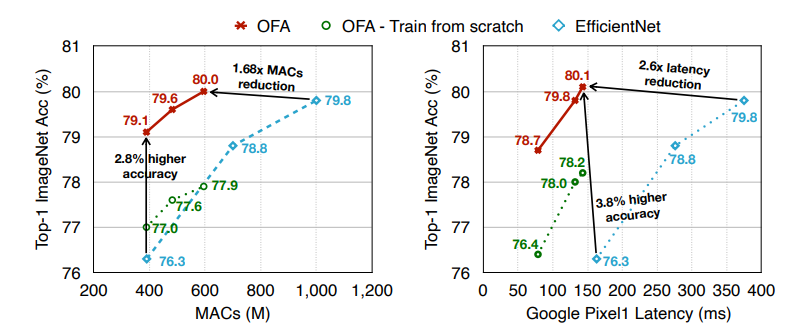

### comparison with mobilenet-v3 ###
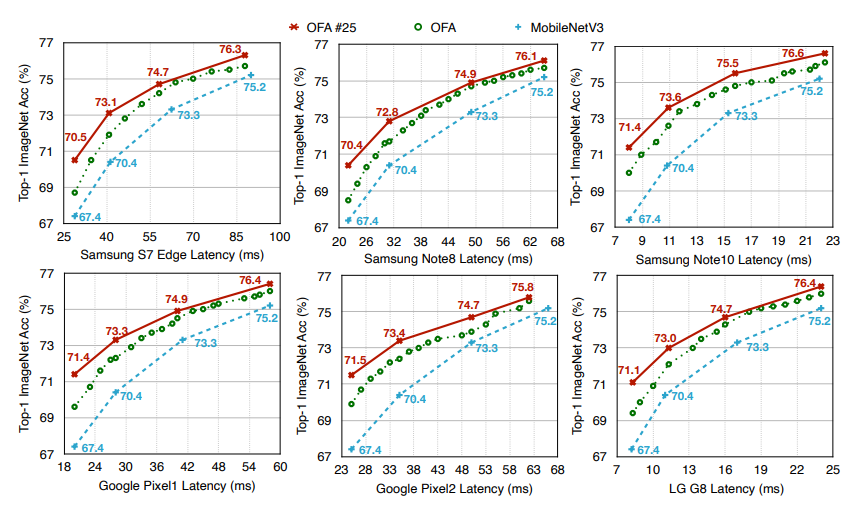

### comparison on various platforms ###
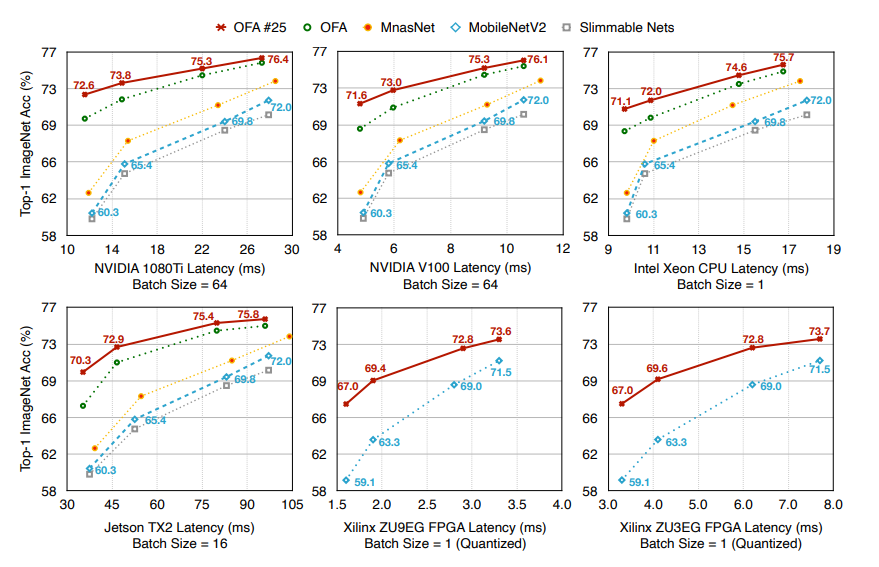
